## Import

In [1]:
import pandas as pd
from utils import import_df
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt

df = import_df("1-data-cleaning-output.json")
df

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_vel,vib_z_acc,vib_z_f1,vib_z_f2,vib_z_f3,vib_z_kurt,vib_z_peak,vib_z_vel,current,label
3050,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,2.844896,1.684042,1.109990,2.106870,0.603318,0.362336,0.576215,2.100146,3.967956,working-engine-1
3051,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,2.838546,1.700080,4.016145,6.259542,4.072398,0.352717,0.611753,2.122022,3.950103,working-engine-1
3052,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,2.835371,1.668003,7.346115,10.625954,4.796380,0.353037,0.573677,2.068546,3.950103,working-engine-1
3053,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,2.863947,1.684042,5.206862,7.816794,4.404223,0.358809,0.581292,2.100146,3.960632,working-engine-1
3056,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,2.848071,1.684042,4.278507,6.473282,3.469080,0.353679,0.596522,2.102577,3.961089,working-engine-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22283,0.886268,-0.237559,-0.379829,-0.722916,0.108178,0.085772,0.603534,0.202503,0.967101,-0.064088,...,2.136941,0.980159,1.000000,1.000000,1.000000,0.985971,0.964322,0.961446,3.951934,magnet-1
22284,0.641361,-0.427534,0.405247,-0.441387,-0.205394,0.900604,-0.234186,-0.014938,-0.731228,0.485237,...,2.136941,0.980159,1.000000,1.000000,1.000000,0.968806,0.935678,1.037751,3.948730,magnet-1
22285,0.760381,0.030237,-0.443917,-0.004216,-0.365614,-0.166002,0.148053,0.161304,0.056137,-0.208286,...,2.069882,0.980159,1.000000,1.000000,1.000000,0.985466,1.002513,1.007229,3.961089,magnet-1
22286,0.467408,0.536074,0.011565,0.156003,0.062401,0.081194,-0.328029,-0.612328,-0.399345,0.334173,...,2.101176,1.017857,1.000000,1.000000,1.000000,0.972340,0.907035,0.854618,3.956054,magnet-1


## Data genaration

In [2]:
for label in df.label.unique():
    print(len(df[df.label == label]))
df_base = df.copy()

782
321
1220
287
3821
1875


In [3]:
X = df.drop(["label"], axis=1)
y = df.label
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
X_resampled

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_f1,vib_z_f2,vib_z_f3,vib_z_kurt,vib_z_peak,vib_z_vel,current
0,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,0.685517,2.844896,1.684042,1.109990,2.106870,0.603318,0.362336,0.576215,2.100146,3.967956
1,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,0.740439,2.838546,1.700080,4.016145,6.259542,4.072398,0.352717,0.611753,2.122022,3.950103
2,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,0.724166,2.835371,1.668003,7.346115,10.625954,4.796380,0.353037,0.573677,2.068546,3.950103
3,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,0.756713,2.863947,1.684042,5.206862,7.816794,4.404223,0.358809,0.581292,2.100146,3.960632
4,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,0.752644,2.848071,1.684042,4.278507,6.473282,3.469080,0.353679,0.596522,2.102577,3.961089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22921,-0.232146,2.840548,0.746672,-0.099012,0.300348,-0.393775,-0.072982,-0.343870,-0.629392,-0.219107,...,0.969111,0.949522,0.998479,1.000000,1.000000,1.000000,1.002560,1.057036,1.190790,3.945367
22922,-0.167300,2.119135,1.372963,-0.668532,-0.349460,-0.023378,0.450226,-0.073280,0.101566,0.034908,...,1.021653,1.029846,1.017857,1.000000,1.000000,1.000000,0.990300,0.977089,1.089210,3.937826
22923,-0.058138,2.520993,0.033221,0.224259,-1.031996,-0.004699,-0.089056,-1.264614,-0.365026,-0.311701,...,1.005416,1.025897,0.980159,1.000000,1.000000,1.000000,0.979238,0.995588,1.128210,3.948523
22924,-0.012512,2.502016,0.837341,-0.582203,-0.218960,-0.301206,0.628619,0.003866,-0.580428,-0.360171,...,0.927506,0.957534,1.017857,1.000000,1.000000,1.000000,0.968282,0.950531,1.050185,3.936099


In [4]:
df = X_resampled
df["label"] = y_resampled

In [5]:
for label in X_resampled.label.unique():
    print(len(df[df.label == label]))

3821
3821
3821
3821
3821
3821


## Export

In [6]:
with open("2-data-generation-output.json", "w") as f:
    f.write(df.to_json())

## Visualize

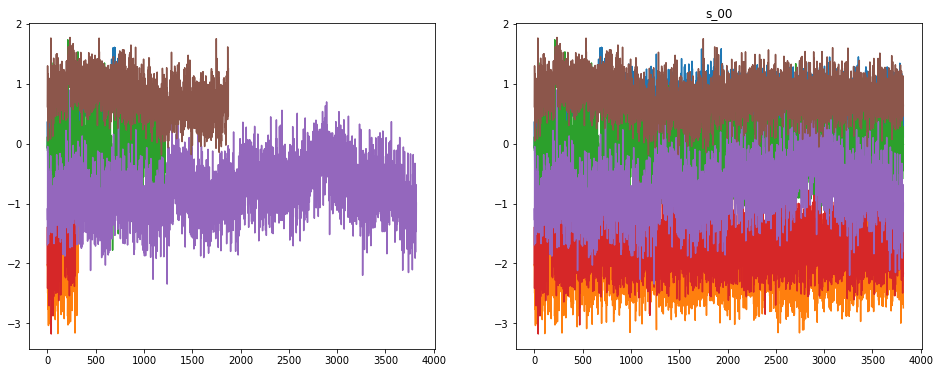

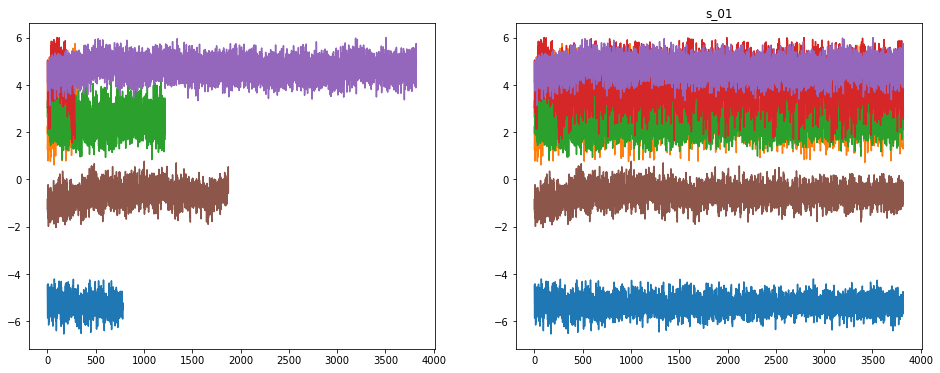

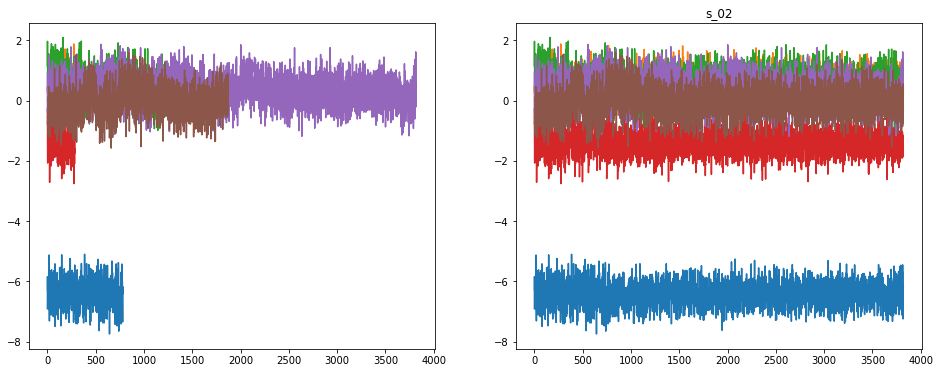

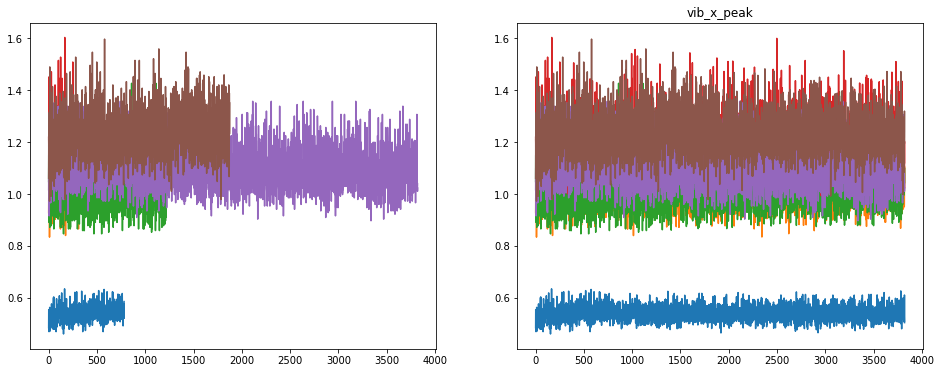

In [7]:
for col in ['s_00', 's_01', 's_02', 'vib_x_peak']:
    fig, (ax1, ax2) = plt.subplots(1,2)
    for label in df.label.unique():
        dff = df[df.label == label][col].reset_index()
        ax2.plot(dff[col], label=label)
        dff = df_base[df_base.label == label][col].reset_index()
        ax1.plot(dff[col], label=label)
    fig.set_size_inches(16, 6)
    plt.title(col)
    plt.show()

## Data visulization

In [8]:
import umap
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df_dr = df.drop(["label"], axis=1)
reducer = PCA()
embedding= reducer.fit_transform(df_dr)
c=[sns.color_palette()[x] for x in pd.factorize(df.label)[0]]

In [9]:
df_dr = df_base.drop(["label"], axis=1)
reducer = PCA()
embedding_base= reducer.fit_transform(df_dr)
c_base=[sns.color_palette()[x] for x in pd.factorize(df_base.label)[0]]

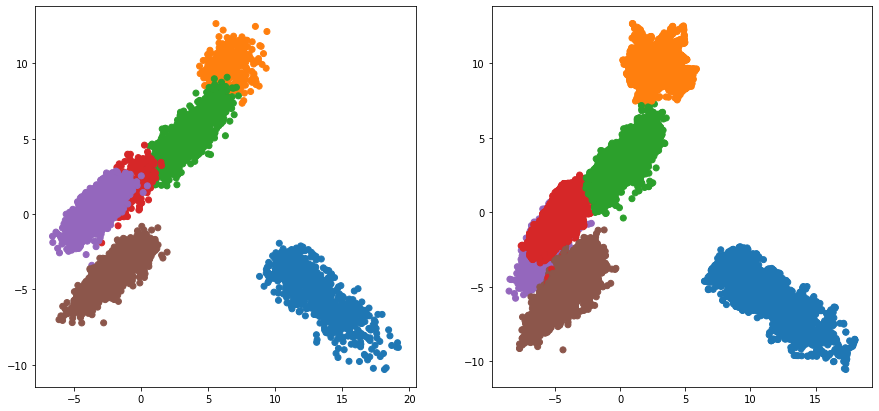

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.scatter(embedding_base[:, 0], embedding_base[:, 1], c=c_base)
ax2.scatter(embedding[:, 0], embedding[:, 1], c=c)
plt.show()